# Unit 6 Assignment: Part 1 

## The Titanic Database edited by Alex Chen

### Part A

**1. Read in the Titanic cvs dataset as "data".**

In this case, I print the head five lines of the dataset to test my code.

In [1]:
# Load the data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("titanic.csv")
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Part B

**2. Clean up any data necessary. In this case, I round the age.**

Since the dataset is already very clean, the only thing I can do is processing the data of age into integer.

In [2]:
round(data["Age"])
data.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


### Part C

**3. Create at least 5 plots that help explain the data.**

I. The Bar Graph of Survived and Unsurvived Passenger on each class.

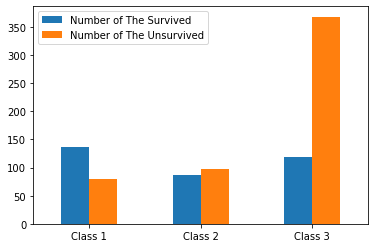

In [76]:
# Bar Graph
S1 = data[(data['Survived'] == 1) & (data['Pclass'] == 1)]
U1 = data[(data['Survived'] == 0) & (data['Pclass'] == 1)]
S2 = data[(data['Survived'] == 1) & (data['Pclass'] == 2)]
U2 = data[(data['Survived'] == 0) & (data['Pclass'] == 2)]
S3 = data[(data['Survived'] == 1) & (data['Pclass'] == 3)]
U3 = data[(data['Survived'] == 0) & (data['Pclass'] == 3)]
Spassenger = [S1.shape[0],S2.shape[0],S3.shape[0]]
Upassenger = [U1.shape[0],U2.shape[0],U3.shape[0]]

##Split every number of passengers into each class and print out
index = ['Class 1', 'Class 2', 'Class 3']
df = pd.DataFrame({'Number of The Survived': Spassenger,'Number of The Unsurvived': Upassenger}, index=index)
ax = df.plot.bar(rot=0)

**Plot Explanation:** This bar graph compares the number of survived and unsurvived passenger on each class. It is easy to determine that higher class passengers enjoy higher survival rate in Titanic. The total numbers of class 1 and class 2 passengers are similar but both of them are far less than the number of class 3 passengers. For my perspective, Pclass is a very closely related variable to help researchers build the machine learning model and I guess higher class would be more equipped by better survival device.

**Code Explanation:** In order to compare all of the passenger numbers directly especially on the same class, I choose bar graph and put the number of the survived and unsurvived into the same index. The filter is the key of this plot for finding six values with different survival situation and Pclass. After that, I call the DataFrame.plot.bar function to create this plot and set the rot as zero.

II. The Pie Chart of Survived and Unsurvived Male and Female.

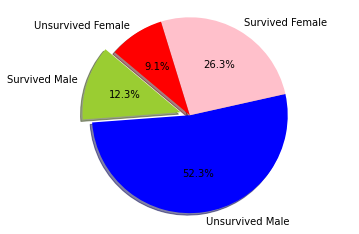

In [77]:
#Pie Chart
labels = 'Survived Male', 'Unsurvived Male', 'Survived Female', 'Unsurvived Female'
SM = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]
UM = data[(data['Survived'] == 0) & (data['Sex'] == 'male')]
SF = data[(data['Survived'] == 1) & (data['Sex'] == 'female')]
UF = data[(data['Survived'] == 0) & (data['Sex'] == 'female')]
sizes = [SM.shape[0], UM.shape[0], SF.shape[0], UF.shape[0]]
colors = ['yellowgreen','blue','pink', 'red']
explode = (0.1, 0, 0, 0)  #explode 1st slice

##Show
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Plot Explanation:** This pie chart state the ratio of male and female with survival situation. Although the majority of the Titanic passengers are male, it is obvious that the survival rate of female are much higher than the survival rate of male. In my opinion, female passengers are more likely to be saved due to their physical weakness especially in accident.

**Code Explanation**: In order to calculate and state the percentage of these four values clearly, I choose pie chart. At the begining, I use the filter to find the values of male and female whether they are survived or unsurvived. After that, I call the function plt.pie with various colors and set the axis to 'equal'. Exploding the first slice is necessary because it notice the reader where to begin with.

III. The Histogram of Age Probability of The Survived and The Unsurvived.

In [78]:
##Here is the data collection
totalage =  data
sage = data[data['Survived'] == 1]
uage = data[data['Survived'] == 0]

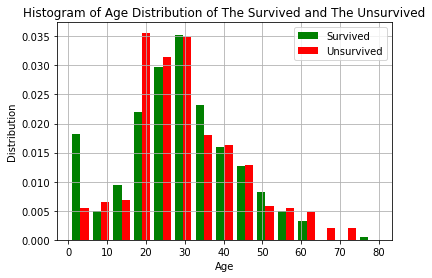

In [79]:
#Histogram
plt.hist([sage['Age'],uage['Age']],15,density=True, color=['green','red'], label=['Survived','Unsurvived'])
plt.legend(prop={'size': 10})
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title("Histogram of Age Distribution of The Survived and The Unsurvived")
plt.grid(True)

plt.show()

**Plot Explanation:** The histogram shows the distribution of different ages whether passengers are survived or unsurvived. To be honest, the distribution of the survived and unsurvived are very close on each age period so I would like to take a guess that age is not a related variable for creating machine learning model.

**Code Explanation**: In order to compare the distribution of various continuous ages, I choose the histogram for putting all values on the x-axis from 0-year-old to 80-year-old. I call the hist function to create the double index histogram for comparing. After that, I label x-axis, y-axis and the title and print it out.

IV. The Box Plot of Fare of The Survived and The Unsurvived

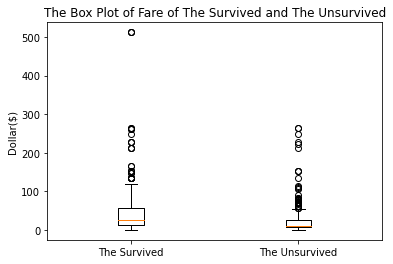

In [80]:
#Box Plot
plt.title('The Box Plot of Fare of The Survived and The Unsurvived')
plt.boxplot([sage['Fare'],uage['Fare']])
plt.ylabel("Dollar($)")
plt.xticks([1,2],["The Survived","The Unsurvived"])
plt.show()

**Plot Explanation:** The box plot states the spreads of fares from the survived and unsurvived. Generally speaking, the survived pay more than the unsurvived especially for those outliers. However, it is still obvious that the Q1 and Q3 of the fare of the unsurvived are located from the Q1 and the Q3 of the survived. In conclusion, I would consider fare as a possible variable to build the machine learning model but not the important variable.

**Code Explanation**: Firstly, I input the title of the box plot. Secondly, I set the databases of the fares from the survived and the unsurvived. After that, I input the y-axis label and x-axis ticks. In the end, I print it out.

V. The Scatter Plot of The Relatives Abroad and The Survival Rate.

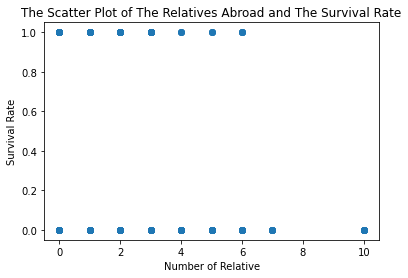

In [89]:
plt.scatter(data['Siblings/Spouses Aboard']+data['Parents/Children Aboard'],data['Survived'])
plt.title('The Scatter Plot of The Relatives Abroad and The Survival Rate')
plt.xlabel("Number of Relative")
plt.ylabel("Survival Rate")
plt.show()

**Plot Explanation:** The scatter plot shows the potential relationship between one independent variable and one dependent variable. In this case, it is really hard to identify a clear relationship between the number of relatives and the survival rate. From my perspective, the number of relatives could be useless for modeling machine learning.

**Code Explanation:** Firstly, I set the databases of the number of relatives and the survival rate as independent variable and dependent variable. Secondly, I input the title, x-axis label and y-axis label. In the end, I print it out.

### That is the end of my Exploratory Analysis of the Titanic Data Set. Thanks for reading!

## Alex Chen
## Ms. Postma
## ICS4U-01
## 2021/03/16